### Context

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.
In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes. 
 

### Objective:
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.

 
### Dataset:
- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)
- Housing (Categories: own, rent, or free)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))

In [53]:
# import libraries
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
# import data set
data = pd.read_csv("German_Credit.csv")

In [3]:
# check data load
data.sample(8)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
900,43,male,skilled,rent,little,little,2625,16,1,car
868,37,male,skilled,own,little,moderate,7409,36,0,business
321,32,male,skilled,own,little,little,1938,24,1,radio/TV
713,25,male,unskilled_and_non-resident,own,little,little,1138,9,0,radio/TV
816,62,male,skilled,own,quite rich,moderate,1338,6,0,domestic appliances
176,42,male,skilled,own,little,little,2577,12,0,furniture/equipment
942,31,male,skilled,own,little,moderate,929,24,0,furniture/equipment
658,28,female,skilled,own,little,moderate,4221,30,0,business


#### Data Info

In [4]:
# check number of observations and columns
data.shape

(1000, 10)

In [5]:
# basic data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [25]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.lower()

In [26]:
# check null values
data.isnull().sum().sort_values()

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
risk                0
purpose             0
dtype: int64

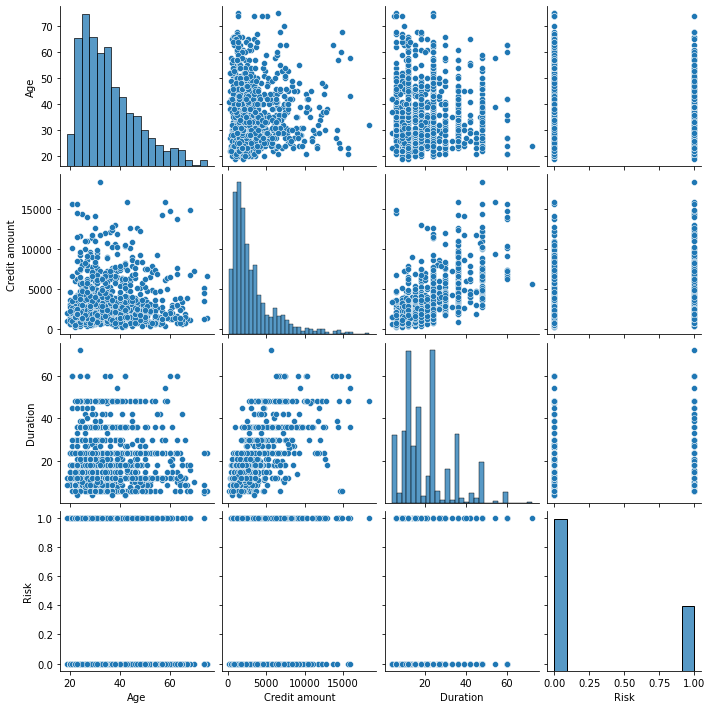

In [11]:
# pairplot for numeric data types
sns.pairplot(data=data)

In [27]:
# check correlation
data.corr()

,age,credit_amount,duration,risk
age,1.000000,0.032716,-0.036136,-0.091127
credit_amount,0.032716,1.000000,0.624984,0.154739
duration,-0.036136,0.624984,1.000000,0.214927
risk,-0.091127,0.154739,0.214927,1.000000


In [28]:
# check unique values of each object
cat_col = data.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print('\n')

sex
male      690
female    310
Name: sex, dtype: int64


job
skilled                       630
unskilled_and_non-resident    222
highly skilled                148
Name: job, dtype: int64


housing
own     713
rent    179
free    108
Name: housing, dtype: int64


saving_accounts
little        786
moderate      103
quite rich     63
rich           48
Name: saving_accounts, dtype: int64


checking_account
moderate    472
little      465
rich         63
Name: checking_account, dtype: int64


purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: purpose, dtype: int64




In [30]:
# let's convert the columns with ordered values into numerical - job, saving_accounts, checking_account
job_dict = {'unskilled_and_non-resident':1,'skilled':2,'highly skilled':3}
saving_accounts_dict = {'little':1,'moderate':2,'quite rich':3,'rich':4}
checking_account_dict = {'little':1,'moderate':2,'rich':3}

data['job']= data['job'].map(job_dict)
data['saving_accounts']= data['saving_accounts'].map(saving_accounts_dict)
data['checking_account'] = data['checking_account'].map(checking_account_dict)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   1000 non-null   int64 
 5   checking_account  1000 non-null   int64 
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   risk              1000 non-null   int64 
 9   purpose           1000 non-null   object
dtypes: int64(7), object(3)
memory usage: 78.2+ KB


In [35]:
# check unique values of each object
num_col = data.select_dtypes(include=['int64']).columns
for col in num_col:
    print(col)
    print(data[col].value_counts())
    print('\n')

age
27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: age, dtype: int64


job
2    630
1    222
3    148
Name: job, dtype: int64


saving_accounts
1    786
2    103
3     63
4     48
Name: saving_accounts, dtype: int64


checking_account
2    472
1    465
3     63
Name: checking_account, dtype: int64


credit_amount
1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: credit_amount, Length: 921, dtype: int64


duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
3

In [39]:
X = data.drop('risk',axis=1)
y = data['risk']

In [40]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
X.head()

,age,job,saving_accounts,checking_account,credit_amount,duration,sex_male,housing_own,housing_rent,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,2,1,1,1169,6,1,1,0,0,0,0,0,1,0,0
1,22,2,1,2,5951,48,0,1,0,0,0,0,0,1,0,0
2,49,1,1,1,2096,12,1,1,0,0,0,1,0,0,0,0
3,45,2,1,1,7882,42,1,0,0,0,0,0,1,0,0,0
4,53,2,1,1,4870,24,1,0,0,1,0,0,0,0,0,0


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
x_train.head()

,age,job,saving_accounts,checking_account,credit_amount,duration,sex_male,housing_own,housing_rent,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
731,21,1,1,1,1987,24,1,0,1,0,0,0,0,1,0,0
716,40,2,1,2,3077,30,1,1,0,0,0,0,0,1,0,0
640,27,1,1,1,750,18,0,1,0,0,0,1,0,0,0,0
804,24,1,1,2,7472,12,0,0,1,1,0,0,0,0,0,0
737,35,1,2,1,4380,18,1,1,0,1,0,0,0,0,0,0


In [44]:
y_train.value_counts()

0    486
1    214
Name: risk, dtype: int64

In [45]:
y_test.value_counts()

0    214
1     86
Name: risk, dtype: int64

In [47]:
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.016817 -0.044579 -0.318967 -0.213043  0.000013  0.039771 -0.350807   

         7         8         9        10        11        12        13  \
0 -0.24321  0.246638 -0.092875  0.124184  0.002889  0.012543 -0.445864   

         14        15  intercept  
0  0.189747 -0.056704   0.185134  


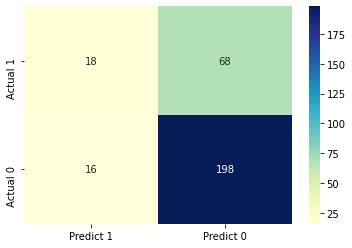

In [54]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

data_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# plt.fi(figsize=(15,9))
sns.heatmap(data_cm, annot=True,fmt='g',cmap="YlGnBu")
plt.show()